In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\multi_final\\data\\2022년.csv")
df

C:\Users\hyeon\AppData\Local\Temp\ipykernel_29620\2239766557.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\multi_final\\data\\2022년.csv")


,일시,대여소번호,대여소명,시간대,거치대수량,addr1,addr2,기온,강수형태,강수량,총생활인구수
0,20220101,1153,"1153. 발산역 1번, 9번 인근 대여소",0,8,가양1동,강서구,-4.4,0.0,0.0,38576.0839
1,20220101,2701,2701. 마곡나루역 5번출구 뒤편,0,10,가양1동,강서구,-4.4,0.0,0.0,38576.0839
2,20220101,2715,2715.마곡나루역 2번 출구,0,1,가양1동,강서구,-4.4,0.0,0.0,38576.0839
3,20220101,2721,2721.등촌1-10단지 교차로,0,15,가양1동,강서구,-4.4,0.0,0.0,38576.0839
4,20220101,2728,2728.마곡나루역 3번 출구,0,32,가양1동,강서구,-4.4,0.0,0.0,38576.0839
...,...,...,...,...,...,...,...,...,...,...,...
78685,20221231,1160,1160. 양천향교역 7번출구앞,2300,2,등촌3동,강서구,0.0,0.0,0.0,35279.8527
78686,20221231,1166,1166. 강서구립등빛도서관,2300,2,등촌3동,강서구,0.0,0.0,0.0,35279.8527
78687,20221231,1158,1158. 가양역 8번출구,2300,5,가양2동,강서구,0.0,0.0,0.0,12038.4905
78688,20221231,1124,1124. 발산역 6번 출구 뒤,2300,16,우장산동,강서구,0.0,0.0,0.0,29005.5010


In [15]:
# 대여소 번호별 총 거치대 수를 사전으로 정의
total_docks = {
    1124: 6,
    1153: 17,
    1158: 20,
    1160: 20,
    1166: 10,
    2701: 26,
    2715: 25,
    2721: 12,
    2728: 55,
    3798: 11
}

In [16]:
# 거치대 수량을 해당 대여소의 총 거치대 수로 나누는 함수 정의
def calculate_dock_ratio(row):
    station_id = row['대여소번호']
    if station_id in total_docks:
        total_dock = total_docks[station_id]
        return row['거치대수량'] / total_dock
    else:
        return None  # 대여소 번호가 사전에 없는 경우 None 반환


In [17]:
# 새로운 열 '거치대비율'에 계산 결과 적용
df['거치대비율'] = df.apply(calculate_dock_ratio, axis=1)

In [18]:
# 결과 확인
df

# df.drop('강수량', axis = 1, inplace = True) 강수량 칼럼 제거 앞전에 진행

,일시,대여소번호,대여소명,시간대,거치대수량,addr1,addr2,기온,강수형태,강수량,총생활인구수,거치대비율
0,20220101,1153,"1153. 발산역 1번, 9번 인근 대여소",0,8,가양1동,강서구,-4.4,0.0,0.0,38576.0839,0.470588
1,20220101,2701,2701. 마곡나루역 5번출구 뒤편,0,10,가양1동,강서구,-4.4,0.0,0.0,38576.0839,0.384615
2,20220101,2715,2715.마곡나루역 2번 출구,0,1,가양1동,강서구,-4.4,0.0,0.0,38576.0839,0.040000
3,20220101,2721,2721.등촌1-10단지 교차로,0,15,가양1동,강서구,-4.4,0.0,0.0,38576.0839,1.250000
4,20220101,2728,2728.마곡나루역 3번 출구,0,32,가양1동,강서구,-4.4,0.0,0.0,38576.0839,0.581818
...,...,...,...,...,...,...,...,...,...,...,...,...
78685,20221231,1160,1160. 양천향교역 7번출구앞,2300,2,등촌3동,강서구,0.0,0.0,0.0,35279.8527,0.100000
78686,20221231,1166,1166. 강서구립등빛도서관,2300,2,등촌3동,강서구,0.0,0.0,0.0,35279.8527,0.200000
78687,20221231,1158,1158. 가양역 8번출구,2300,5,가양2동,강서구,0.0,0.0,0.0,12038.4905,0.250000
78688,20221231,1124,1124. 발산역 6번 출구 뒤,2300,16,우장산동,강서구,0.0,0.0,0.0,29005.5010,2.666667


In [19]:
import numpy as np

In [20]:
# 문자열 데이터를 가진 칼럼 제외
numeric_df = df.select_dtypes(include=[np.number])

In [21]:
# 상관계수 계산
correlation_matrix = numeric_df.corr()


In [22]:
import seaborn as sns

c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


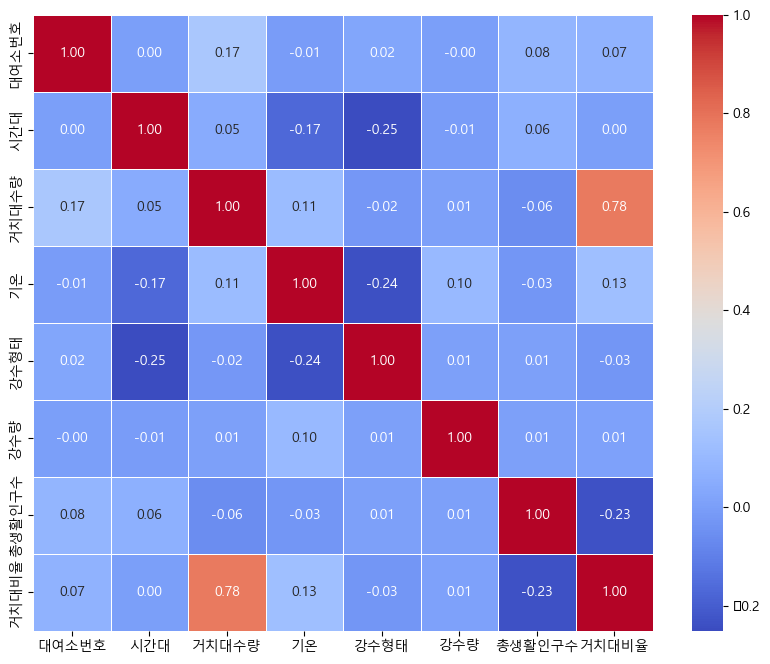

In [23]:
# 히트맵 시각화
plt.figure(figsize=(10, 8)) # 히트맵의 크기 설정
plt.rc('font', family="Malgun Gothic")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()